<a href="https://colab.research.google.com/github/bkim9/Resume/blob/main/14_6_The_Object_Detection_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount to my drive
from google.colab import drive
drive.mount('/content/drive')

# clone d2l github
!git clone https://github.com/d2l-ai/d2l-pytorch-colab.git

%cd ./d2l-pytorch-colab

Mounted at /content/drive
Cloning into 'd2l-pytorch-colab'...
remote: Enumerating objects: 10698, done.
remote: Counting objects: 100% (10698/10698), done.
remote: Compressing objects: 100% (1944/1944), done.
remote: Total 10698 (delta 8600), reused 10681 (delta 8590), pack-reused 0
Receiving objects: 100% (10698/10698), 205.41 MiB | 37.53 MiB/s, done.
Resolving deltas: 100% (8600/8600), done.
/content/d2l-pytorch-colab


In [ ]:
%matplotlib inline
import os
import pandas as pd
import torch
import torchvision
from d2l import torch as d2l

d2l.DATA_HUB['banana-detection'] = (
    d2l.DATA_URL + 'banana-detection.zip',
    '5de26c8fce5ccdea9f91267273464dc968d20d72')

In [ ]:
def read_data_bananas(is_train=True):
    """Read the banana detection dataset images and labels."""
    data_dir = d2l.download_extract('banana-detection')
    csv_fname = os.path.join(data_dir, 'bananas_train' if is_train
                             else 'bananas_val', 'label.csv')
    csv_data = pd.read_csv(csv_fname)
    csv_data = csv_data.set_index('img_name')
    images, targets = [], []
    for img_name, target in csv_data.iterrows():
        images.append(torchvision.io.read_image(
            os.path.join(data_dir, 'bananas_train' if is_train else
                         'bananas_val', 'images', f'{img_name}')))
        # Here `target` contains (class, upper-left x, upper-left y,
        # lower-right x, lower-right y), where all the images have the same
        # banana class (index 0)
        targets.append(list(target))
    return images, torch.tensor(targets).unsqueeze(1) / 256

In [ ]:

class BananasDataset(torch.utils.data.Dataset):
    """A customized dataset to load the banana detection dataset."""
    def __init__(self, is_train):
        self.features, self.labels = read_data_bananas(is_train)
        print('read ' + str(len(self.features)) + (f' training examples' if
              is_train else f' validation examples'))

    def __getitem__(self, idx):
        return (self.features[idx].float(), self.labels[idx])

    def __len__(self):
        return len(self.features)

In [ ]:

def load_data_bananas(batch_size):
    """Load the banana detection dataset."""
    train_iter = torch.utils.data.DataLoader(BananasDataset(is_train=True),
                                             batch_size, shuffle=True)
    val_iter = torch.utils.data.DataLoader(BananasDataset(is_train=False),
                                           batch_size)
    return train_iter, val_iter

In [ ]:
batch_size, edge_size = 32, 256
train_iter, _ = load_data_bananas(batch_size)
batch = next(iter(train_iter))
batch[0].shape, batch[1].shape

read 1000 training examples
read 100 validation examples


(torch.Size([32, 3, 256, 256]), torch.Size([32, 1, 5]))

torch.Size([10, 256, 256, 3])


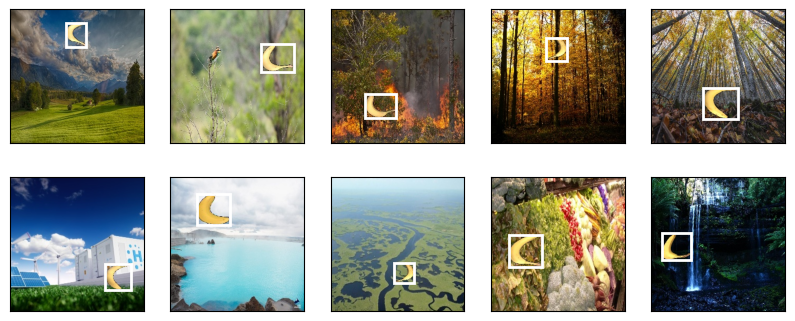

In [ ]:
imgs = (batch[0][:10].permute(0, 2, 3, 1)) / 255
print(imgs.shape)
axes = d2l.show_images(imgs, 2, 5, scale=2)
for ax, label in zip(axes, batch[1][:10]):
    d2l.show_bboxes(ax, [label[0][1:5] * edge_size], colors=['w'])

tensor([[[[ 51.,  52.,  53.,  ...,  63.,  63.,  63.],
          [ 52.,  53.,  53.,  ...,  64.,  63.,  62.],
          [ 53.,  53.,  54.,  ...,  64.,  62.,  62.],
          ...,
          [186., 189., 196.,  ..., 192., 204., 181.],
          [177., 169., 177.,  ..., 176., 178., 172.],
          [124., 143., 172.,  ..., 179., 173., 169.]],

         [[113., 114., 114.,  ..., 123., 125., 125.],
          [114., 115., 114.,  ..., 124., 125., 124.],
          [115., 115., 115.,  ..., 124., 124., 124.],
          ...,
          [103., 102., 102.,  ..., 110., 124., 105.],
          [ 95.,  86.,  87.,  ..., 101., 107., 102.],
          [ 44.,  62.,  83.,  ..., 108., 103., 101.]],

         [[164., 165., 168.,  ..., 173., 176., 176.],
          [165., 166., 168.,  ..., 174., 176., 175.],
          [166., 166., 169.,  ..., 176., 175., 175.],
          ...,
          [ 51.,  48.,  41.,  ...,  52.,  71.,  53.],
          [ 45.,  32.,  27.,  ...,  44.,  55.,  53.],
          [  0.,   7.,  25.,  ...